In [14]:
import pandas as pd, numpy as np

madelon_test = 'madelon_test.data'
madelon_train = 'madelon_train.data'
madelon_train_labels = 'madelon_train.labels'


İndirdiğimiz verileri okuyarak başlıyoruz, verilen linkteki train datasını ve train laberlarını indirdim. Bir de ek olarak
en son modelimizi test etmek için test datasını indirdim.

In [15]:
madelon_test_df = pd.read_csv(madelon_test, delimiter=' ', header=None)
madelon_test_df.drop([500], axis=1, inplace=True)
madelon_test_df.shape
madelon_test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,460,559,477,462,491,499,475,495,479,...,470,480,546,630,434,497,479,503,465,494
1,484,509,538,473,548,497,551,477,498,471,...,474,482,493,442,440,587,475,483,509,455
2,476,529,558,477,505,486,545,477,473,480,...,501,482,465,389,460,459,484,476,564,521
3,487,475,480,494,477,472,512,477,486,480,...,470,476,536,622,523,445,481,490,481,548
4,486,490,480,471,520,481,437,476,484,482,...,458,473,474,491,516,515,475,497,453,497


Test datamızı incelediğimizde 500 adet özellik olduğunu görüyoruz.Param dosyasını açtığımızda bu bilgilere ulaşıyoruz.500 adet
feature verilmiş fakat featurelerin ne olduğu verilmemiş. 500. Column verilerin targetı olduğu için ve bize NaN olarak verildiği için o sütunu çıkarttım.

Data type: non-sparse
Number of features: 500
Number of examples and check-sums:
     	Pos_ex	Neg_ex	Tot_ex	Check_sum
Train	 1000	 1000	 2000	488083511.00
Valid	  300	  300	  600	146395833.00
Test	  900	  900	 1800	439209553.00
All  	 2200	 2200	 4400	1073688897.00


In [35]:
madelon_test_df.isna().sum().sum()

0

Eksik veri varsa diye kontrol ediyoruz. Na olan değerler eksik değer demektir o yüzden bu fonksiyondan dönen değer
0 ise yok demektir. 0 dan farklı olsaydı o değerleri uygun değerlerle değiştirmek zorunda olabilirdik. Çünkü na değerler
hem eğitilmede hem de tahmin etmede sorunlara yol açar.

In [16]:
madelon_train_df = pd.read_csv(madelon_train, delimiter=' ', header=None)
madelon_train_df.shape
madelon_train_df.drop([500], axis=1, inplace=True)
madelon_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


Aynı şekilde yukarıdaki gibi train datalarımızı da okuyoruz, na olan sütunu dropluyoruz ve kontrol ediyoruz.

In [34]:
madelon_train_df.isna().sum().sum()

0

0 çıkması na değeri yok demektir. Bu da bizim için iyi bir şey. Ekstra olarak uğraşmamıza gerek yok demektir.

In [17]:
madelon_train_labels_df = pd.read_csv(madelon_train_labels, delimiter=' ', header=None, names=['target'])
madelon_train_labels_df.shape
madelon_train_labels_df.head()

,target
0,-1
1,-1
2,-1
3,1
4,1


In [64]:
madelon_train_labels_df.isna().sum().sum()

0

Train labellarımıza bakıyorum ve onlarda da na değeri yok her şey yolunda gidiyor.

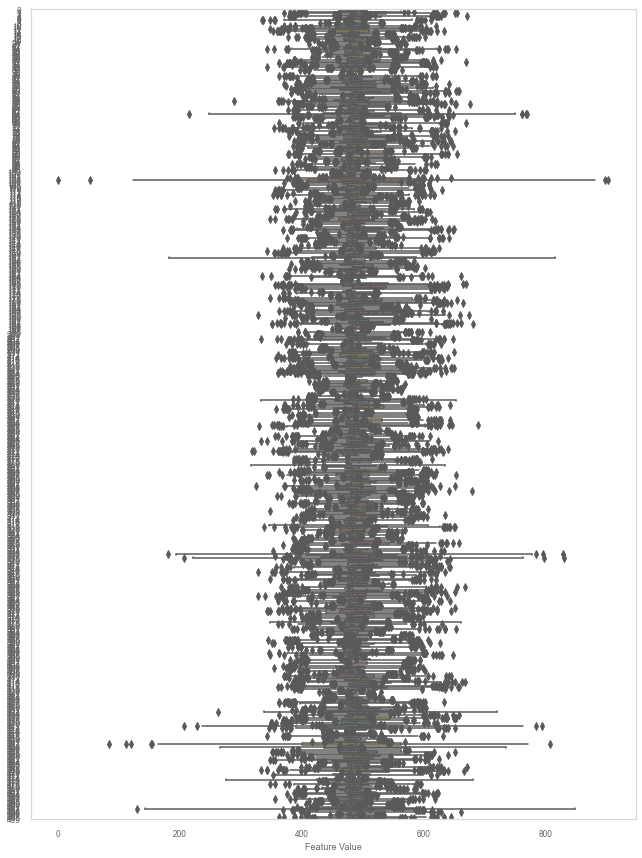

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 0.75)
sns.set_style({'axes.facecolor': '1.0', 'axes.edgecolor': '0.85', 'grid.color': '0.85',
               'grid.linestyle': '-', 'axes.labelcolor': '0.4', 'xtick.color': '0.4',
               'ytick.color': '0.4', 'axes.grid': False})

# Create box plots based on feature type

# Set the figure size
f, ax = plt.subplots(figsize=(9, 12))
sns.boxplot(data=mad_X_train, orient="h", palette="Set2")

# Set axis label
plt.xlabel('Feature Value')

# Tight layout
f.tight_layout()

# Save figure
f.savefig(f'Box Plots.png', dpi = 1080)

In [ ]:
Verimizdeki aykırı değerleri kontrol etmek için yazdığım fonksiyon. Görüyoruz ki çoğu featuremizde outlierlar bulunuyor.
Dahası, tüm Madelon benzeri özellikler sıfır etrafında ortalanmış ve
çoğu Gauss dağılımına sahip gibi görünüyor. Kritik özellikler farklı ortalama değerler etrafında merkezlenmiştir

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV

mad_X_train, mad_X_test, mad_y_train, mad_y_test = train_test_split(madelon_train_df,madelon_train_labels_df)

display(mad_X_train.shape)
display(mad_X_test.shape)
display(mad_y_train.shape)
display(mad_y_test.shape)

(1500, 500)

(500, 500)

(1500, 1)

(500, 1)

Modellerimizi eğitmek için gerekli olan test-train dosyalarını ayırıyoruz. Bunu yapmamım sebebi train dosyalarının labellarını bulamamam bu yüzden bunu yapıyorum. Burda train_test_split fonksiyonu yardımıyla datamızı ayırabiliyoruz.

Veriseti içindeki özelliklerin sınıflamada ki ayırt ediciliklerine göre sıralanması için Sklearn kütüphanesinden Pipeline, StandardScaler ve SelectKBest ve SelectFromModel methodlarını kullanmaya karar  verdim.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE

selectk_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(k=20))
])

selectk_pipe.fit(mad_X_train, mad_y_train)

C:\Users\grupofis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('scaler', StandardScaler()), ('select', SelectKBest(k=20))])

In [70]:
feature_scores = (selectk_pipe.named_steps['select'].scores_)
len(feature_scores)

500

In [71]:
feature_scores[:5]

array([0.14177364, 0.25932553, 2.49106554, 0.25523987, 4.48761138])

In [73]:
madelon_feature_pvalues = list(zip(mad_X_train.columns, selectk_pipe.named_steps['select'].pvalues_))
madelon_top20_feat_pvalues = sorted(madelon_feature_pvalues, key=lambda x: x[1])[:20]
madelon_top20_feat_pvalues

[(475, 1.6900214557981753e-17),
 (241, 2.1323532182673567e-17),
 (336, 3.5474943563816003e-09),
 (64, 4.394896246118072e-09),
 (48, 8.58868387688297e-07),
 (128, 1.0386582573531505e-06),
 (105, 1.3621105131759965e-06),
 (378, 1.8423560770725085e-06),
 (338, 1.9708964370208566e-05),
 (442, 8.110968586184164e-05),
 (493, 8.441553672239184e-05),
 (453, 8.557061209206754e-05),
 (472, 9.222575825631392e-05),
 (323, 0.0025147233384680448),
 (329, 0.003346755832016985),
 (152, 0.007590930594489659),
 (471, 0.009119785609037808),
 (205, 0.011161356888675703),
 (46, 0.011525136989719133),
 (468, 0.012932818267187913)]

Modelimiz için en ayırt edici 20 özelliği böylece bulmuş olduk.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

names_of_classifiers = ['LogisticRegression', 'KNeighbors', 'DecisionTree']

classifiers = [LogisticRegression(n_jobs=-1, random_state=42),KNeighborsClassifier(n_jobs=-1),DecisionTreeClassifier(random_state=42),]


Yaptığım araştırmalar sonucu en yaygın olarak ve başarılı Modeller olarak Logistik Regression, K Neightbors ve 
Desicion tree modelleri ile karşılaştım. O yüzden ödevde de bu 3 modeli kullanma kararı aldım. Bu modeller sklearn altında hazır sunuldugu için onlari importladım ve sırayla cagırabikmek için onları bir liste içne koydum. İleride bu liste içinden 
sırasıyla çagırıp kullanabilicem.

In [21]:
mad_raw_test_scores = {}
mad_raw_train_scores = {}
mad_raw_y_preds = {}

for name, clfr in zip(names_of_classifiers, classifiers):
    clfr.fit(mad_X_train, mad_y_train)
    
    train_score = clfr.score(mad_X_train, mad_y_train)
    test_score = clfr.score(mad_X_test, mad_y_test)
    y_pred = clfr.predict(mad_X_test)
    
    mad_raw_train_scores[name] = train_score
    mad_raw_test_scores[name] = test_score
    mad_raw_y_preds[name] = y_pred

C:\Users\grupofis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\grupofis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Yukarıda modelleri içine koydugum listedeki modelleri sırayla çağırıyorum. eğitip tahmin ettirip çıkan sonuçları da test scores, train scores adını verdiğim sözlüklerde tutuyorum. Bunları ileride başarı oranlarını, karmaşıklık matrislerini hesaplamak için kullanıcağım için böyle bir yol izledim. Modeller .fit methodları ile eğitiliyor, .score ile scoreları elde ediliyor ve en son da .predict ile verilen data için bir tahmin yapmaları isteniyor. Bu işlemler sonucunda da model eğitilmiş
tahmin etmiş oluyor ve çıkan sonucları yorumlamak için hazır durumda.


In [22]:
mad_raw_test_scores

{'LogisticRegression': 0.52, 'KNeighbors': 0.73, 'DecisionTree': 0.726}

Test sonuclarına göre en başarılı model K neighbors modelimiz olmus, Daha sonra Desicion tree en kötü olarak da Logistic
Regression modeli olmuş. Bunun sebebi datamızın karışık olması, kullandığımız modellerin karışıklık durumları olabilir. Bu sonuclar modelimizin görmediği verilerle alındığı için baz almamız gereken sonuclardır. İleride görüceğimiz gibi eğitim sırasında elde ettiğimiz sonuclar yanıltıcı olabilir.

In [23]:
mad_raw_train_scores

{'LogisticRegression': 0.7453333333333333,
 'KNeighbors': 0.8266666666666667,
 'DecisionTree': 1.0}

Bahsettiğimiz gibi, bu sonuclar eğitim sonuclarıdır. Bu sonuclar bizi yanıltabilir çünkü eğitilen veriler üzerinden elde edilen verilerdir. eğitimde kullanılmayan verilerden elde ettiğimiz sonuclar daha saglıklıdır. Burda görüyoruz ki DesicionTree değerimiz 1 çıkmış yani hepsini doğru yapmış fakat yukarıdaki sonuclardan biliyoruz ki en iyi modelimiz Desicion tree değil. O yüzden bu sonuclar bizi yanıltmamalı. Çünkü overfitting-underfitting adını verdiğimiz sonuclar gerçekleşmiş olabilir.

In [24]:
mad_raw_y_preds

{'LogisticRegression': array([-1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
        -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,
         1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
         1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
         1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
         1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
         1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
         1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
         1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
         1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1

Burda da verilerimize göre nasıl tahmin edildiğini görüyoruz. 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from pprint import pprint


madelon_classification_reports = {}

for classifier in names_of_classifiers:
    madelon_classification_reports[classifier] = classification_report(mad_y_test, mad_raw_y_preds[classifier])

pprint(madelon_classification_reports)

{'DecisionTree': '              precision    recall  f1-score   support\n'
                 '\n'
                 '          -1       0.75      0.73      0.74       264\n'
                 '           1       0.71      0.72      0.71       236\n'
                 '\n'
                 '    accuracy                           0.73       500\n'
                 '   macro avg       0.73      0.73      0.73       500\n'
                 'weighted avg       0.73      0.73      0.73       500\n',
 'KNeighbors': '              precision    recall  f1-score   support\n'
               '\n'
               '          -1       0.72      0.79      0.76       264\n'
               '           1       0.74      0.66      0.70       236\n'
               '\n'
               '    accuracy                           0.73       500\n'
               '   macro avg       0.73      0.73      0.73       500\n'
               'weighted avg       0.73      0.73      0.73       500\n',
 'LogisticRegression': '  

Yine sklearn kütüphanesini jullanarak elde ettiğimiz verilere bakıyoruz. Bu sayede modellerimizin presicion değerlerini, recall değerlerini f1 scorelarını, supportlarını ve en önemlisi accuracylerini görebiliriz. Accuracylerine baktığımızda yukarıdaki gibi en iyi modelimiz K neighbor olmuş, ondan sonra Desicion Tree en son ise Logistic Regression modelini görüyoruz.

In [38]:
def generate_confusion_matrix_madelon (y_actual, y_preds):
    conf_matrix = pd.DataFrame(confusion_matrix(y_actual, y_preds), columns=['Predicted -1', 'Predicted 1'], \
                               index=['Actual -1', 'Actual 1'])
    return conf_matrix

In [39]:
madelon_confusion_matrices = {}

for classifier in names_of_classifiers:
    madelon_confusion_matrices[classifier] = generate_confusion_matrix_madelon(mad_y_test, mad_raw_y_preds[classifier])
    
pprint(madelon_confusion_matrices)

{'DecisionTree':            Predicted -1  Predicted 1
Actual -1           193           71
Actual 1             66          170,
 'KNeighbors':            Predicted -1  Predicted 1
Actual -1           209           55
Actual 1             80          156,
 'LogisticRegression':            Predicted -1  Predicted 1
Actual -1           127          137
Actual 1            103          133}


Ödevde confusion matrix istendiği için bu fonksiyonu da yazıyoruz. Confusion matrixdeki gösterilen şey ise Predicted -1, Predicted +1, Actual -1 ve Actual +1 değerlerini görüyoruz. Burda önemli olan köşegenlerdeki yani tahmin -1, gerçekte -1 ve tahmin +1 ve gerçekte +1 olan durumlardır. Bunlar bizim modelimizin dogru bildiği durumlardır. Geride kalanlar ise yanlıs sınıflandırma yaptıgımız yani accuracymizi düşüren olaylardır.

Ödevin 3. kısmı olan kümelendirme kısmı için öncelikle elimizdeki veriyi görebiliceğimiz bir yapıya getiriyoruz. Bu sayede olusan kümeleri daha iyi görebiliceğiz.

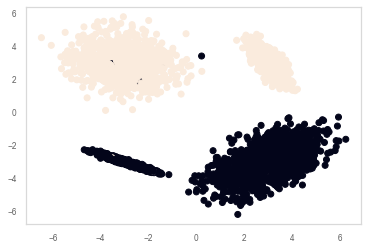

In [41]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=4400,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2, 
                           n_clusters_per_class=2, 
                           class_sep=3.0)
plt.scatter(X[:,0],X[:,1],c=y)

MADELON, beş boyutlu bir hiperküpün köşelerine yerleştirilmiş ve rastgele +1 veya -1 olarak etiketlenmiş 32 kümede gruplanmış veri noktaları içeren yapay bir veri kümesidir. Beş boyut, 5 bilgilendirici özelliği oluşturmaktadır. B Bu 20 özelliğe dayanarak, örnekler 2 sınıfa ayrılmalıdır (+ -1 etiketlerine karşılık gelir). Öngörü gücü olmayan 'probes' adı verilen bir dizi dikkat dağıtıcı özellik ekledik. Özelliklerin ve desenlerin sırası rastgele hale getirildi.

[[-0.01998437 -3.02394453]
 [ 0.00758143  2.99667515]]


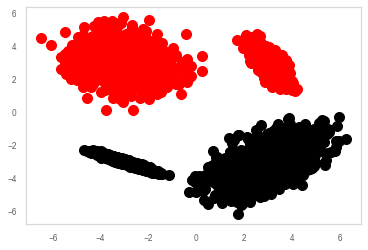

In [43]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X)

plt.scatter(X[y_km ==0,0], X[y_km == 0,1], s=100, c='red')
plt.scatter(X[y_km ==1,0], X[y_km == 1,1], s=100, c='black')
plt.scatter(X[y_km ==2,0], X[y_km == 2,1], s=100, c='blue')
plt.scatter(X[y_km ==3,0], X[y_km == 3,1], s=100, c='cyan')

Burda en populer kümelendirme yöntemlerinden biri olan K means yöntemi ile gruplandırıyoruz. Görüldüğü gibi
birbirlerine yakın noktalar yakın kümelendirilmiş. K meansde amaç 2 rastgele nokta seçilip daha sonra o noktalara en yakın şekilde kümelendirme yapmaktır. Burda görüldüğü gibi başarılı şekilde kümelendirme yapılabilinmiş.

In [46]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

Burda zamanlarını da karşılaştırmamıza yarayan plot_clusters kodu bulunuyor. Bunu hazır bi kütüphaneden aldım
daha güzel bir sonuc vermemize yarıcak bir fonksiyon. Mantık olarak ise sadece bu fonksiyonla, cluster çesidini, datayı verip çıktı almamıza yarıyor. 

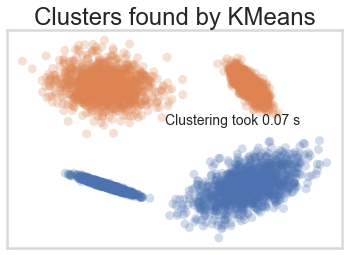

In [51]:
import sklearn.cluster as cluster
import time
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plot_clusters(X, cluster.KMeans, (), {'n_clusters':2})

K-Means, hızlı, anlaşılması kolay ve her yerde mevcut olduğu için çoğu kişi için "go-to" kümeleme algoritmasıdır (kullanmayı önemsediğiniz hemen hemen tüm istatistiksel veya makine öğrenimi araçlarında bir uygulama vardır). Ancak K-Means'in birkaç sorunu var. Birincisi, bir kümeleme algoritması olmaması, bir bölümleme algoritması olmasıdır. Yani K-anlamı, 'kümeleri bulmaz', veri kümenizi, bölüm içi mesafeleri en aza indirmeye çalışarak istediğiniz kadar çok (küresel olduğu varsayılır) parçaya böler. Bu ikinci soruna yol açar: tam olarak kaç tane küme beklediğinizi belirtmeniz gerekir

K Means ile tekrardan deniyoruz ve aldığımız sonuc aynı. Kümelendir işlemi ise 0.07sn sürmüş yani çok hızlı gerçekleşmiş ve doğru şekilde kümelendirilmiş. Fakat baştaki datayı yarattığız resimle karşılaştırınca görüyoruz ki outlier dediğimiz aykırı değerler yanlış değerlendirilmiş bunun sebebi ise K means algoritmasında noktaların kendilerine en yakın olan noktalara göre kümelendirilmesi bu yüzden böyle bir çıktı olmuş.

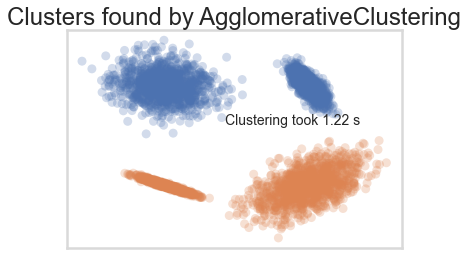

In [55]:
plot_clusters(X, cluster.AgglomerativeClustering, (), {'n_clusters':2, 'linkage':'ward'})


Aglomeratif kümeleme, aslında hepsi aynı fikre dayanan bir algoritmalar paketidir. Temel fikir, kendi kümesindeki her noktayla başlamanız ve daha sonra, her bir küme için, birleştirmek üzere başka bir küme seçmek için bazı ölçütler kullanmanızdır. Tek bir kümeye sahip olana ve veri kümesindeki her nokta için bir yaprağı olan son katmana kadar dallanan kümelerin bir hiyerarşisini veya ikili ağacını elde edene kadar bunu tekrar tekrar yapın. Bunun en temel versiyonu olan tek bağlantı, birleştirmek için en yakın kümeyi seçer ve bu nedenle ağaç, kümelerin ne zaman birleştiği / bölündüğüne göre uzaklığa göre sıralanabilir. Daha karmaşık varyasyonlar, hangi kümenin birleştirileceğini belirlemek için kümeler arasındaki ortalama mesafe veya küme merkezler arasındaki mesafe gibi şeyleri kullanır. Bir küme hiyerarşisine sahip olduğunuzda, bir seviye seçebilir veya kesebilir (bazı kriterlere göre) ve ağacın o seviyesindeki kümeleri alabilirsiniz. Sklearn için genellikle aktarılan "küme sayısı" parametresine göre bir kesim seçeriz.

Kümelendirme 1.22 saniyede tamamlanmış ve K Means ile aynı bir sonuç elde edilmiş.

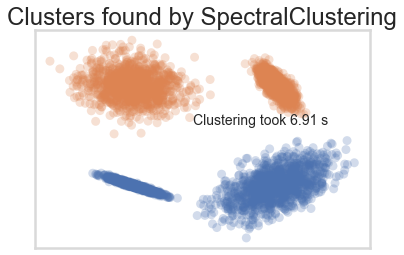

In [63]:
plot_clusters(X, cluster.SpectralClustering, (), {'n_clusters':2})


Spektral kümeleme, en iyi şekilde bir grafik kümeleme olarak düşünülebilir. Uzamsal veriler için, noktalar arasındaki mesafelere (potansiyel olarak bir k-NN grafiği veya hatta yoğun bir grafik) dayalı bir grafik oluşturmayı düşünebilirsiniz. Oradan spektral kümeleme, grafiğin Öklid uzayına iyi (düşük boyutlu) gömülmesini bulmaya çalışmak için grafiğin Laplacian'ın özvektörlerine bakacaktır. Bu, esasen, verinin dayandığı varsayılan bazı manifoldlar için çeşitli mesafeleri daha iyi temsil etmek için orijinal uzayımızın bir dönüşümünü bulan bir tür manifold öğrenimidir. Dönüştürülmüş alanı elde ettikten sonra standart bir kümeleme algoritması çalıştırılır; sklearn ile varsayılan K-Means'dir.

Görüyoruz ki kümelendirme çok uzun zaman almış 6.91 saniye fakat diğerleriyle aynı kümelendirme yapmış.